In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# get paths
path = "./data/cdcAnxiety_googleCovid_COMBINED.csv"
missingPath = "./data/cdcAnxiety_googleCovid_COMBINED_withMissing.csv"
cdcOGPath = "./data/cdc/cdc_US_anxiety_clean.csv"

# import csv
data = pd.read_csv(path)
missingData = pd.read_csv(missingPath)
cdcData = pd.read_csv(cdcOGPath)

In [3]:
# turn data from string to float
data["cdcValue"] = data["cdcValue"].astype(float)
data["googleTrendsCovidValue"] = data["googleTrendsCovidValue"].astype(float)

In [4]:
# normalize cdcValue and googleTrendsCovidValue
data["cdcValue"] = (data["cdcValue"] - data["cdcValue"].min()) / \
    (data["cdcValue"].max() - data["cdcValue"].min())
data["googleTrendsCovidValue"] = (data["googleTrendsCovidValue"] - data["googleTrendsCovidValue"].min()) / \
    (data["googleTrendsCovidValue"].max() -
     data["googleTrendsCovidValue"].min())

In [5]:
# get correlation between googleTrendsCovidValue and cdcValue
corr = data.corr(method="pearson")
print(corr["cdcValue"]["googleTrendsCovidValue"])

0.42612526791484084


In [6]:
# t-test on googleTrendsCovidValue and cdcValue
t, p = ttest_ind(data["cdcValue"], data["googleTrendsCovidValue"])
print(t, p)

3.973094518009974 0.00011046021652891159


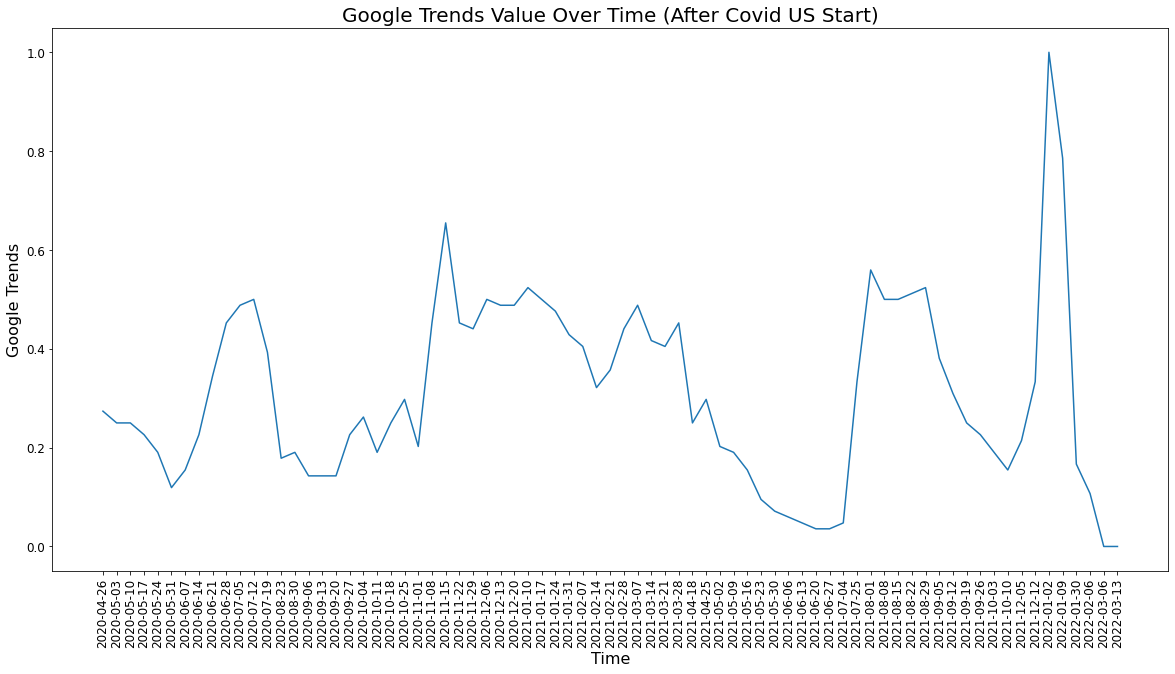

In [7]:
# plot line graph of googleTrendsCovidValue over time
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Google Trends Value Over Time (After Covid US Start)", fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Google Trends", fontsize=16)
plt.plot(data["week"], data["googleTrendsCovidValue"])
plt.xticks(rotation=90)
plt.show()

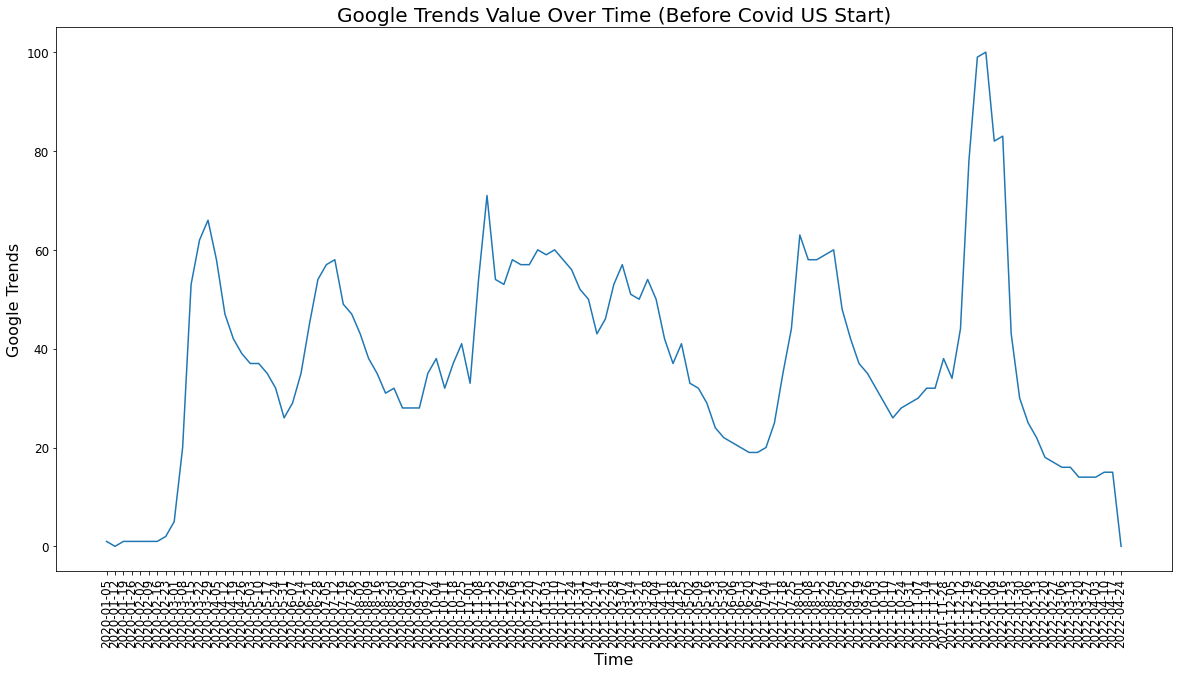

In [16]:
# plot line graph of googleTrendsCovidValue over time from OG google data
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Google Trends Value Over Time (Before Covid US Start)", fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Google Trends", fontsize=16)
plt.plot(missingData["week"], missingData["googleTrendsCovidValue"])
plt.xticks(rotation=90)
plt.show()

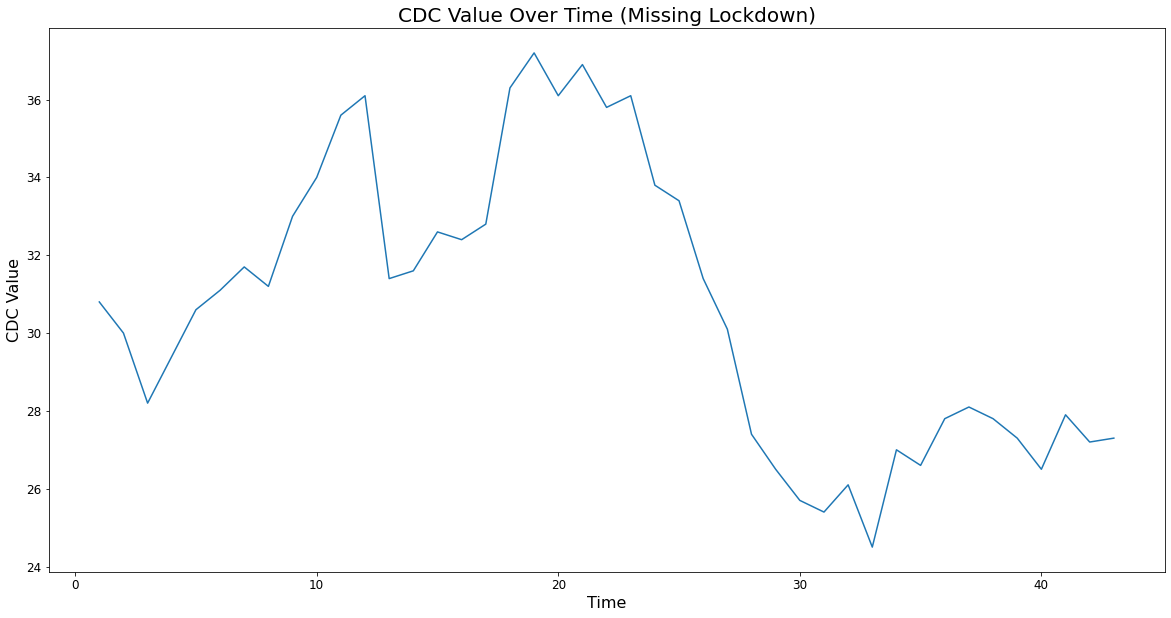

In [9]:
# plot line graph of cdcData over time from OG cdc data
plt.figure(figsize=(20, 10))
# increase the number of x ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("CDC Value Over Time (Missing Lockdown)", fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("CDC Value", fontsize=16)
plt.plot(cdcData["Time Period"], cdcData["Value"])
plt.show()

In [13]:
# show Time Period and Time Period Label for cdcData as a DataFrame
print(cdcData[["Time Period", "Time Period Label"]])

    Time Period            Time Period Label
0             1         Apr 23 - May 5, 2020
1             2         May 7 - May 12, 2020
2             3        May 14 - May 19, 2020
3             4        May 21 - May 26, 2020
4             5        May 28 - June 2, 2020
5             6        June 4 - June 9, 2020
6             7      June 11 - June 16, 2020
7             8      June 18 - June 23, 2020
8             9      June 25 - June 30, 2020
9            10        July 2 - July 7, 2020
10           11       July 9 - July 14, 2020
11           12      July 16 - July 21, 2020
12           13        Aug 19 - Aug 31, 2020
13           14         Sep 2 - Sep 14, 2020
14           15        Sep 16 - Sep 28, 2020
15           16        Sep 30 - Oct 12, 2020
16           17        Oct 14 - Oct 26, 2020
17           18         Oct 28 - Nov 9, 2020
18           19        Nov 11 - Nov 23, 2020
19           20         Nov 25 - Dec 7, 2020
20           21         Dec 9 - Dec 21, 2020
21        

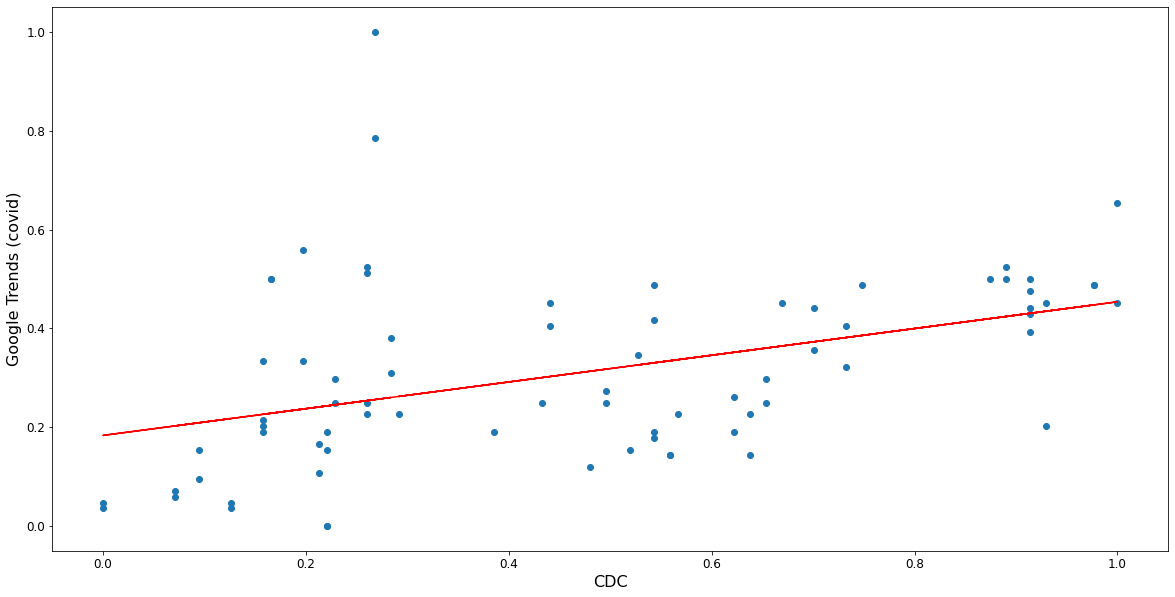

In [19]:
# plot the correlation on a scatter graph
# cdcValue on x-axis and googleTrendsCovidValue on y-axis
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("CDC", fontsize=16)
plt.ylabel("Google Trends (covid)", fontsize=16)
plt.scatter(data["cdcValue"], data["googleTrendsCovidValue"])
z = np.polyfit(data["cdcValue"], data["googleTrendsCovidValue"], 1)
p = np.poly1d(z)
plt.plot(data["cdcValue"], p(data["cdcValue"]), "r-o", markersize=0)
plt.show()

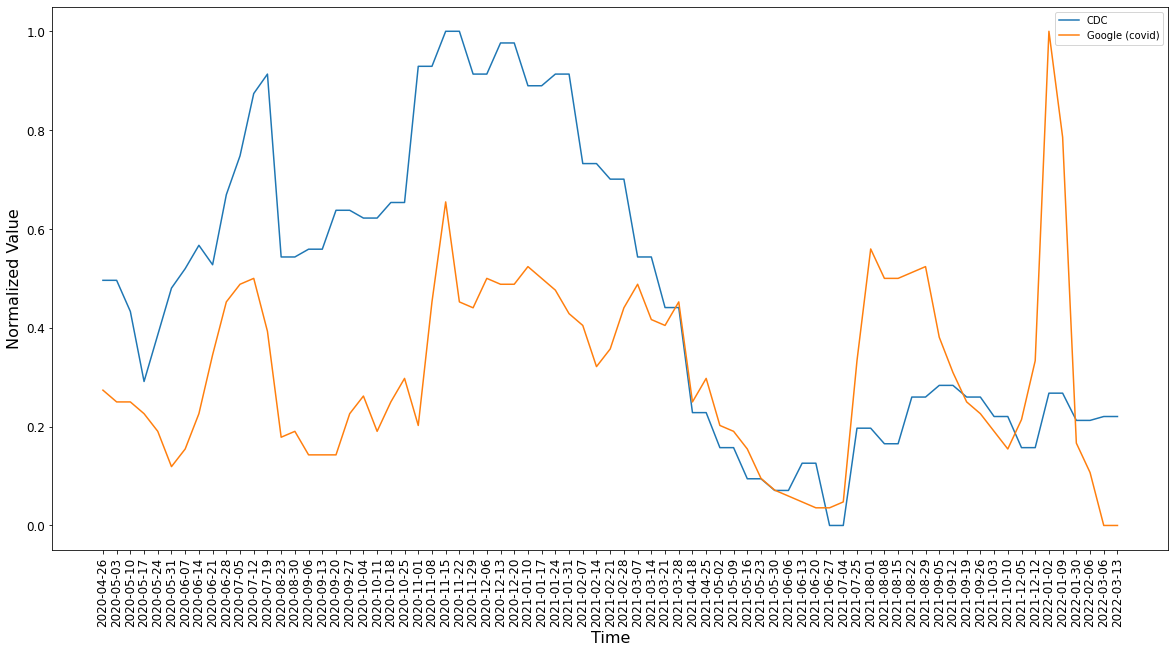

In [21]:
# plot the correlation on a line graph over time
# time on x-axis
# cdcValue on y-axis on the left and googleTrendsCovidValue on y-axis on the right
plt.figure(figsize=(20, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Normalized Value", fontsize=16)
plt.plot(data["week"], data["cdcValue"], label="CDC")
plt.plot(data["week"], data["googleTrendsCovidValue"], label="Google (covid)")
plt.xticks(rotation=90)
plt.legend()
plt.show()